In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Excel file
file_path = 'DSB.csv.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')


data.head()

,Period,ReporterDesc,PartnerDesc,CmdCode,Qty,NetWgt,PrimaryValue,Trade Value
0,2017,Uganda,World,7108,10583.33,10583.33,4.156707e+08,"$415,670,742"
1,2017,Uganda,Belgium,7108,293.00,293.00,1.245272e+07,"$124,527,23"
2,2017,Uganda,United Arab Emirates,7108,9765.33,9765.33,4.003803e+08,"$400,380,291"
3,2017,Uganda,Türkiye,7108,25.00,25.00,1.050859e+06,"$105,085,8"
4,2017,Uganda,USA,7108,500.00,500.00,1.786869e+06,"$178,686,9"


In [2]:
data.describe()

,Period,CmdCode,Qty,NetWgt,PrimaryValue
count,343.000000,343.000000,343.000000,308.000000,3.430000e+02
mean,2020.192420,378450.416910,3277.836035,4239.193945,2.381687e+08
std,1.967053,351825.073084,9003.613908,9542.258650,5.660479e+08
min,2017.000000,7108.000000,0.000000,0.000000,7.500000e-01
25%,2019.000000,7108.000000,0.000000,1.000000,2.884064e+04
50%,2020.000000,710812.000000,2.000000,13.090000,3.410409e+05
75%,2022.000000,710812.000000,338.195500,1630.406250,5.173341e+07
max,2023.000000,710813.000000,66558.878000,66558.878000,3.058855e+09


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Period        343 non-null    int64  
 1   ReporterDesc  343 non-null    object 
 2   PartnerDesc   343 non-null    object 
 3   CmdCode       343 non-null    int64  
 4   Qty           343 non-null    float64
 5   NetWgt        308 non-null    float64
 6   PrimaryValue  343 non-null    float64
 7   Trade Value   343 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 21.6+ KB


In [4]:
data.isnull().sum()/100

Period          0.00
ReporterDesc    0.00
PartnerDesc     0.00
CmdCode         0.00
Qty             0.00
NetWgt          0.35
PrimaryValue    0.00
Trade Value     0.00
dtype: float64

In [5]:
# Ensure 'Trade Value' and 'PrimaryValue' are numeric by removing any non-numeric characters and converting to float
data['Trade Value'] = data['Trade Value'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['PrimaryValue'] = data['PrimaryValue'].astype(float)

data.head()

,Period,ReporterDesc,PartnerDesc,CmdCode,Qty,NetWgt,PrimaryValue,Trade Value
0,2017,Uganda,World,7108,10583.33,10583.33,4.156707e+08,415670742.0
1,2017,Uganda,Belgium,7108,293.00,293.00,1.245272e+07,12452723.0
2,2017,Uganda,United Arab Emirates,7108,9765.33,9765.33,4.003803e+08,400380291.0
3,2017,Uganda,Türkiye,7108,25.00,25.00,1.050859e+06,1050858.0
4,2017,Uganda,USA,7108,500.00,500.00,1.786869e+06,1786869.0


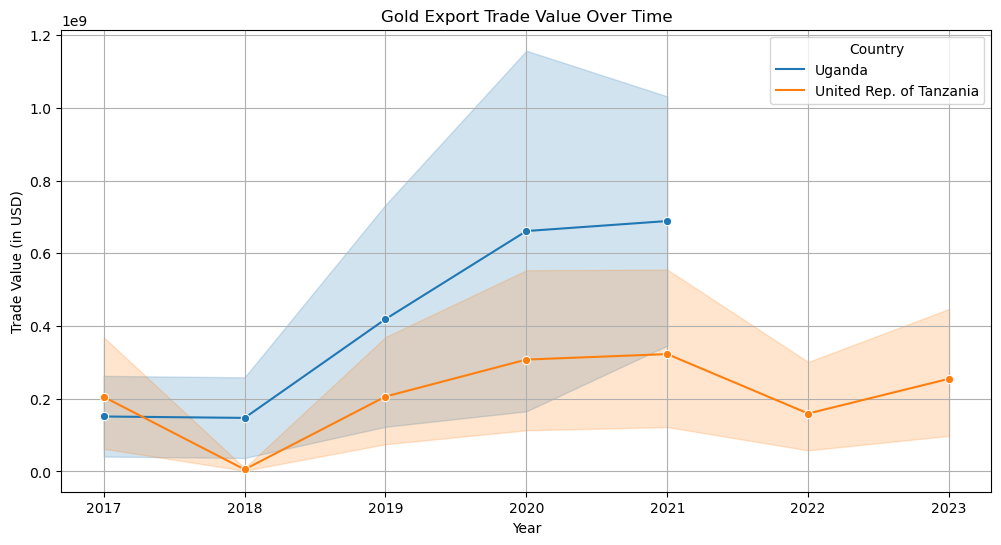

In [6]:
# 1. Overall export trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Period', y='Trade Value', hue='ReporterDesc', marker='o')
plt.title('Gold Export Trade Value Over Time')
plt.xlabel('Year')
plt.ylabel('Trade Value (in USD)')
plt.legend(title='Country')
plt.grid(True)
plt.show()



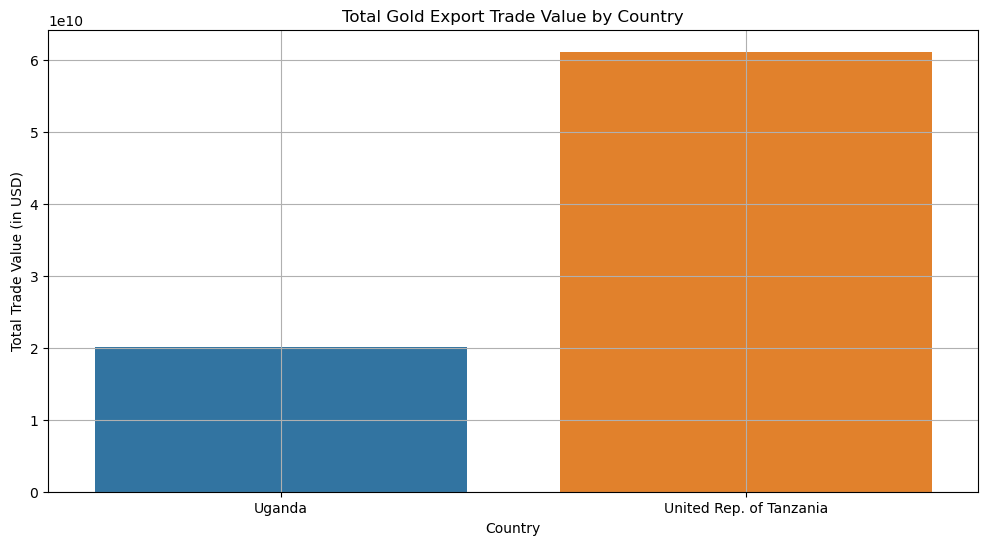

In [7]:
# 2. Comparison of export volumes and values between Uganda and Tanzania
# Plot the total trade value by country
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='ReporterDesc', y='Trade Value', estimator=sum, ci=None)
plt.title('Total Gold Export Trade Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Trade Value (in USD)')
plt.grid(True)
plt.show()



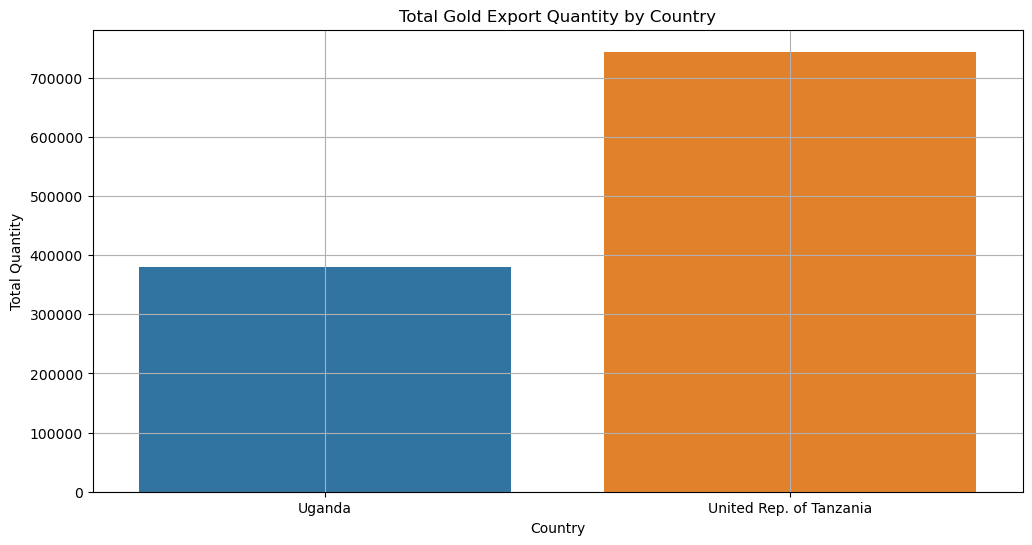

In [8]:
# Plot the total quantity exported by country
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='ReporterDesc', y='Qty', estimator=sum, ci=None)
plt.title('Total Gold Export Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()



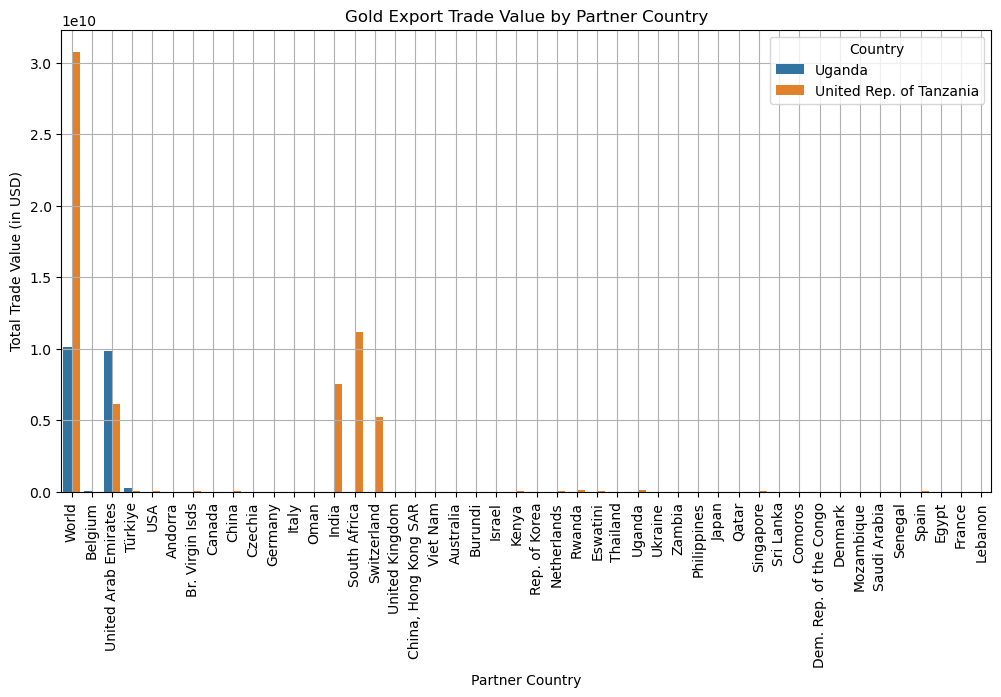

In [9]:
# 3. Key trading partners for each country
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='PartnerDesc', y='Trade Value', hue='ReporterDesc', estimator=sum, ci=None)
plt.title('Gold Export Trade Value by Partner Country')
plt.xlabel('Partner Country')
plt.ylabel('Total Trade Value (in USD)')
plt.legend(title='Country')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



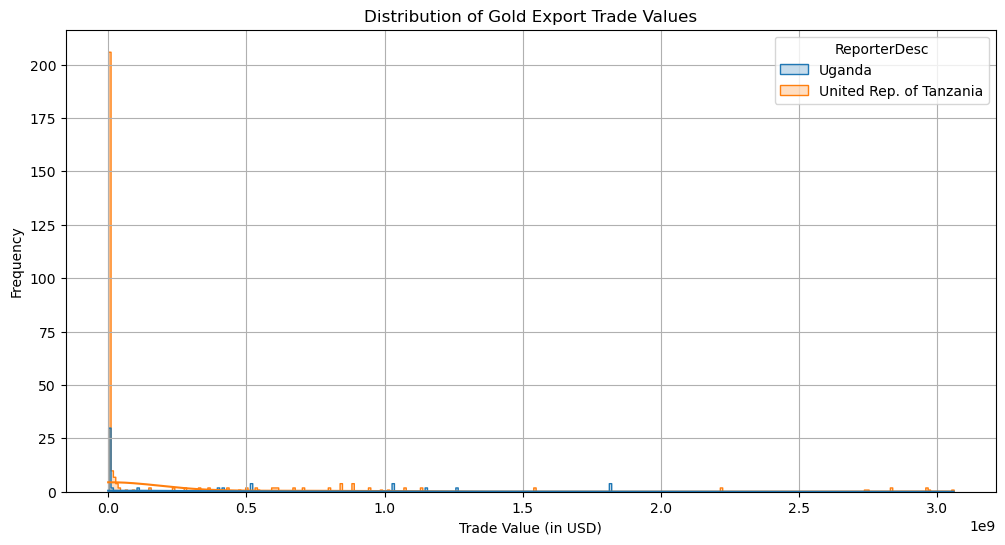

In [10]:
# 4. Distribution of export values
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Trade Value', hue='ReporterDesc', kde=True, element='step')
plt.title('Distribution of Gold Export Trade Values')
plt.xlabel('Trade Value (in USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

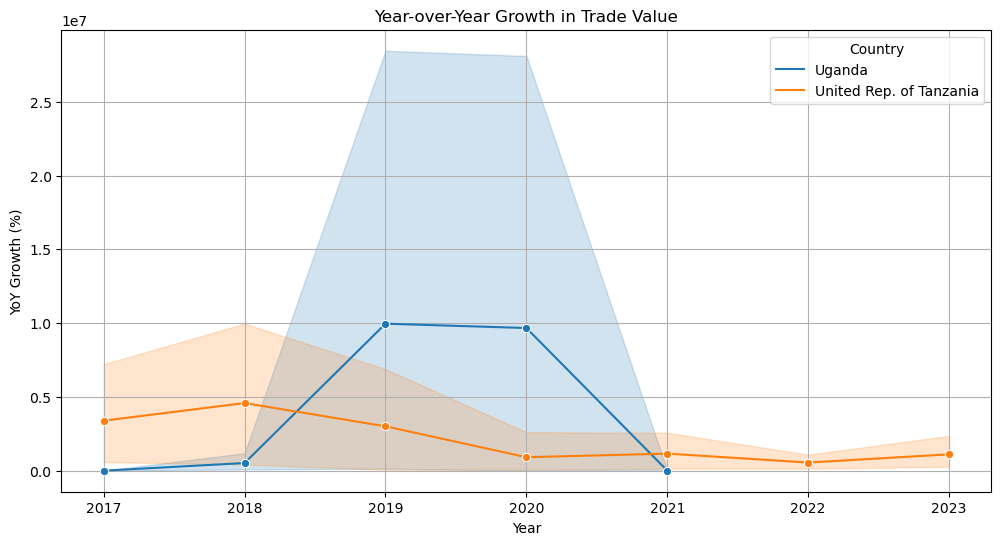

In [11]:
# 5. Year-over-Year Growth in Trade Value
data['Trade Value Lag'] = data.groupby('ReporterDesc')['Trade Value'].shift(1)
data['YoY Growth'] = (data['Trade Value'] - data['Trade Value Lag']) / data['Trade Value Lag'] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Period', y='YoY Growth', hue='ReporterDesc', marker='o')
plt.title('Year-over-Year Growth in Trade Value')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


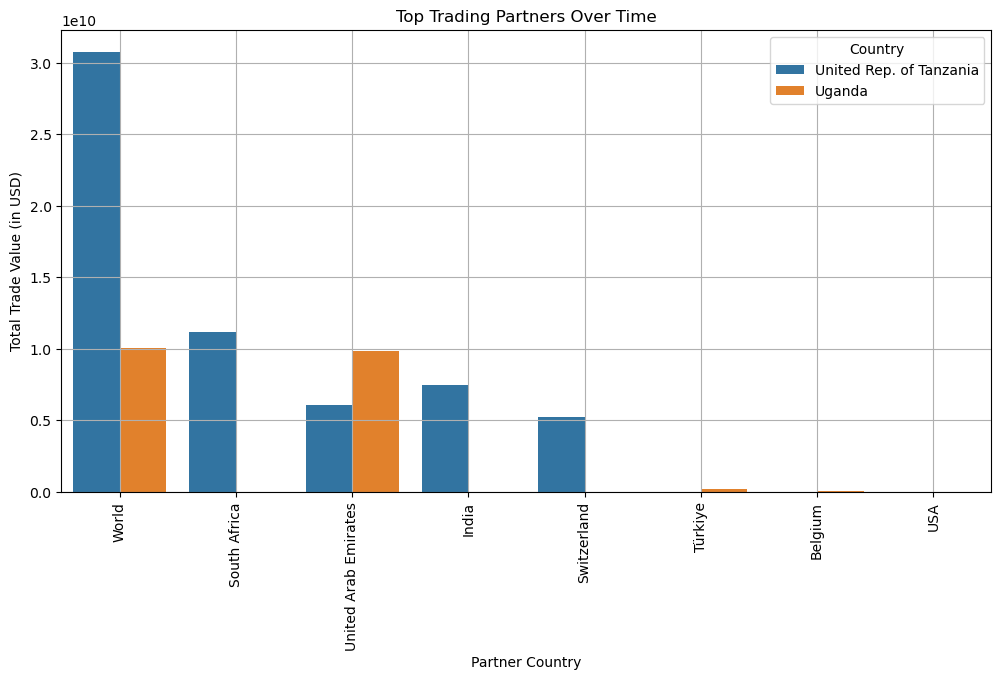

In [12]:
 #6. Top Trading Partners Over Time
top_partners = data.groupby(['ReporterDesc', 'PartnerDesc'])['Trade Value'].sum().reset_index()
top_partners = top_partners.sort_values(by='Trade Value', ascending=False).groupby('ReporterDesc').head(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_partners, x='PartnerDesc', y='Trade Value', hue='ReporterDesc')
plt.title('Top Trading Partners Over Time')
plt.xlabel('Partner Country')
plt.ylabel('Total Trade Value (in USD)')
plt.legend(title='Country')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

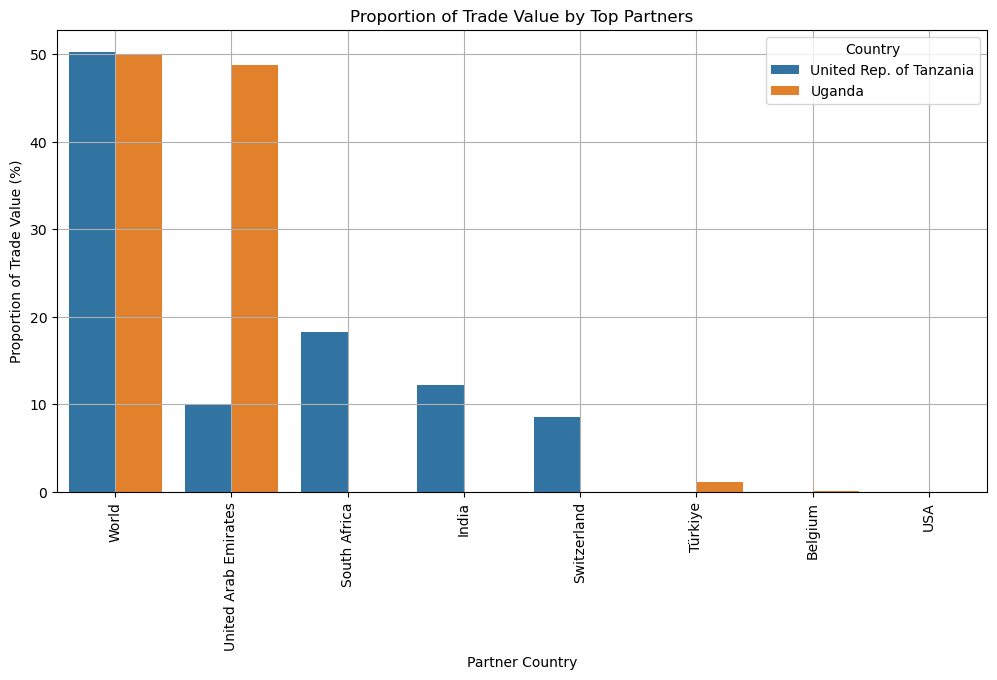

In [13]:
# Calculate the total trade value per country
total_trade_value_per_country = data.groupby('ReporterDesc')['Trade Value'].sum().reset_index()
total_trade_value_per_country.columns = ['ReporterDesc', 'TotalTradeValue']
# Merge the total trade value with the original data
data = pd.merge(data, total_trade_value_per_country, on='ReporterDesc')

# Calculate the proportion of trade value by partner
data['Proportion'] = (data['Trade Value'] / data['TotalTradeValue']) * 100

# Group by country and partner, then sum the proportions
partner_proportion = data.groupby(['ReporterDesc', 'PartnerDesc'])['Proportion'].sum().reset_index()

# Sort values and get the top 5 partners for each country
top_partners = partner_proportion.sort_values(by='Proportion', ascending=False).groupby('ReporterDesc').head(5)

# Plot the proportion of trade value by top partners
plt.figure(figsize=(12, 6))
sns.barplot(data=top_partners, x='PartnerDesc', y='Proportion', hue='ReporterDesc')
plt.title('Proportion of Trade Value by Top Partners')
plt.xlabel('Partner Country')
plt.ylabel('Proportion of Trade Value (%)')
plt.legend(title='Country')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [15]:
# Create a pivot table to compare the commodity codes exported by each country
pivot_table = data.pivot_table(
    values='Qty',
    index='ReporterDesc',
    columns='CmdCode',
    aggfunc='sum',
    fill_value=0
)

# Display the pivot table
pivot_table.head()

CmdCode,7108,710811,710812,710813
ReporterDesc,,,,
Uganda,173929.202,0,1180.942,205481.260
United Rep. of Tanzania,372641.683,15,371002.631,47.042


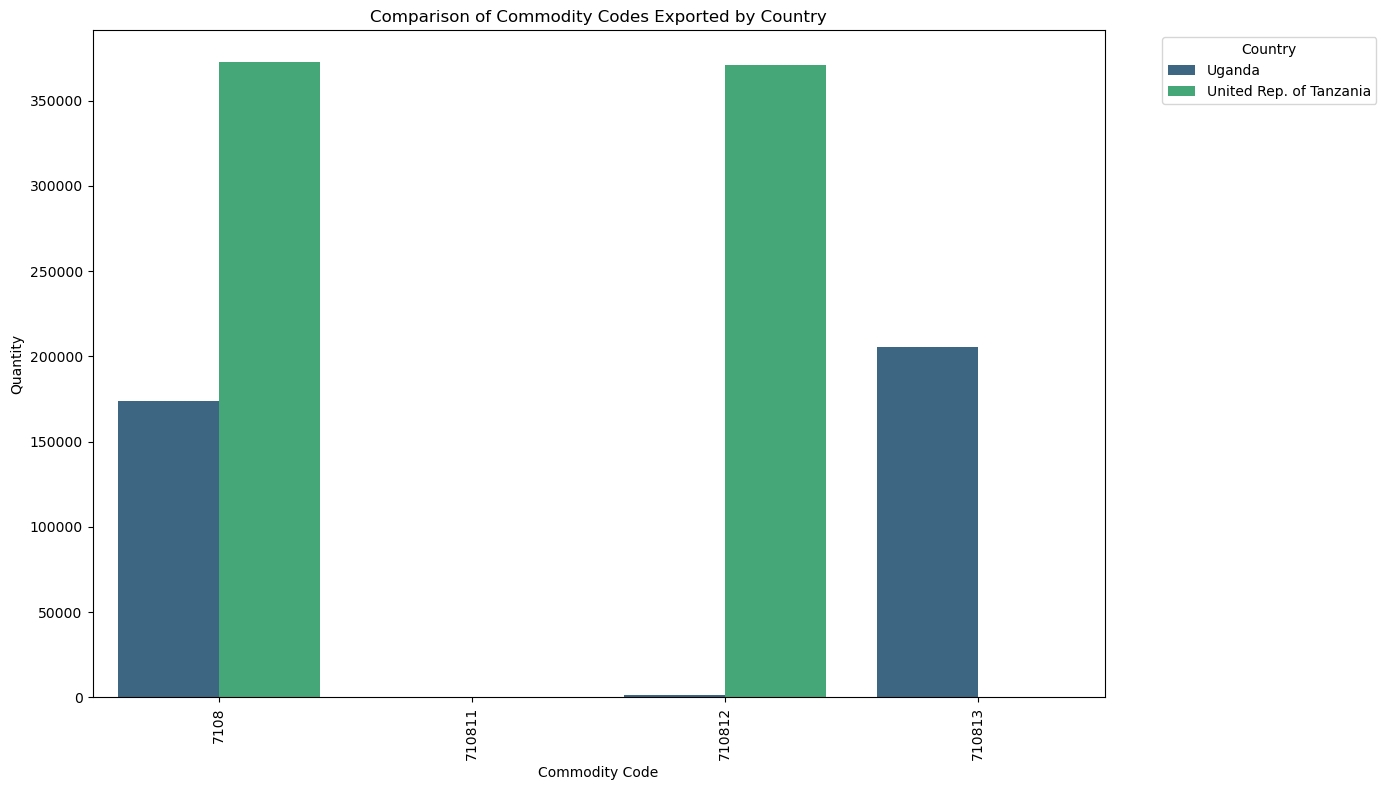

In [16]:
# Load the Excel file
excel_file_path = 'DSB.csv.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Create a pivot table to compare the commodity codes exported by each country
pivot_table = df_excel.pivot_table(
    values='Qty',
    index='ReporterDesc',
    columns='CmdCode',
    aggfunc='sum',
    fill_value=0
)

#Convert pivot table to long format for better plotting with seaborn
pivot_long = pivot_table.reset_index().melt(id_vars='ReporterDesc', var_name='CmdCode', value_name='Qty')

# Plot the clustered bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=pivot_long, x='CmdCode', y='Qty', hue='ReporterDesc', palette='viridis')
plt.title('Comparison of Commodity Codes Exported by Country')
plt.xlabel('Commodity Code')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


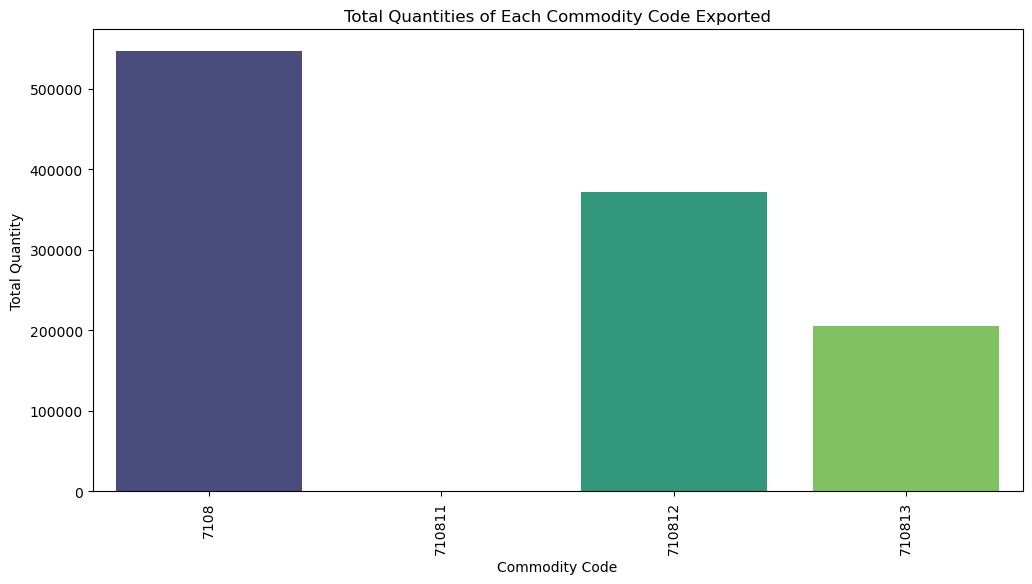

In [17]:
# Create another graph to compare total quantities of each commodity code
total_qty_per_code = df_excel.groupby('CmdCode')['Qty'].sum().sort_values(ascending=False)

# Plot total quantities of each commodity code
plt.figure(figsize=(12, 6))
sns.barplot(x=total_qty_per_code.index, y=total_qty_per_code.values, palette="viridis")
plt.title('Total Quantities of Each Commodity Code Exported')
plt.xlabel('Commodity Code')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()